In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('C:/Users/habensalah/Downloads/Project 1/Project 1/projet1.csv')



C:\Users\habensalah\AppData\Local\Temp\ipykernel_15824\673229951.py:7: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/habensalah/Downloads/Project 1/Project 1/projet1.csv')


# Data visualization 


In [3]:
pd.set_option('display.max_columns',None)
df.head()

,asip,pports,adip,portd,Protocole,État,Durée,Octetss,Octetsd,dvs,dvd,ps,pd,Service,Charge-s,Charge-r,Paquets-s,Paquets-r,FS,FD,NSTCP-S,NSTCP-D,TMS,TMD,Profondeur-t,Lcorps de réponse-rep,Jitter source,Jitter destination,Td,Tf,Int-paquets-s,Int-paquets-d,RTT TCP,SYNACK,ACKDAT,Estps-ip,SC-DV-état,SV-flue HTTP method,EsTfTP-login,SC-FTP-CMD,SC-service-S,SC-service-D,SC-d-LTM,SC-source-LTM,SC-source-dport-LTM,SC-d-sport-LTM,SC-d-S-LTM,Catégorie d'attaque
0,175.45.176.0,47439,149.171.126.10,53,udp,INT,0.000008,114,0,254,0,0,0,dns,5.700000e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424260642,1424260642,0.008000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,33,33,33,34,33,16,33,Generic
1,59.166.0.9,5467,149.171.126.0,53,udp,CON,0.001351,130,162,31,29,0,0,dns,3.849001e+05,4.796447e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424231073,1424231073,0.006000,0.003000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,3,4,2,1,1,2,NaN
2,175.45.176.3,1043,149.171.126.15,53,udp,INT,0.000001,114,0,254,0,0,0,dns,4.560000e+08,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424245946,1424245946,0.001000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,29,29,19,19,19,10,29,Generic
3,59.166.0.8,58115,149.171.126.5,56000,tcp,FIN,0.047746,3614,48202,31,29,7,24,-,5.954844e+05,7.950237e+06,60,64,255,255,2598168742,2630944202,60,753,0,0,49.338206,47.762731,1424257262,1424257262,0.803814,0.761081,0.000668,0.000556,0.000112,0,0,NaN,NaN,,13,4,2,2,1,1,2,NaN
4,59.166.0.0,12789,149.171.126.0,80,tcp,FIN,1.096957,1580,10168,31,29,3,5,http,1.056742e+04,7.004103e+04,12,18,255,255,2955029510,857504530,132,565,1,3924,9689.928198,7808.578559,1424253469,1424253470,99.691997,64.492058,0.000728,0.000588,0.000140,0,0,1.0,NaN,,1,1,1,3,1,1,1,NaN


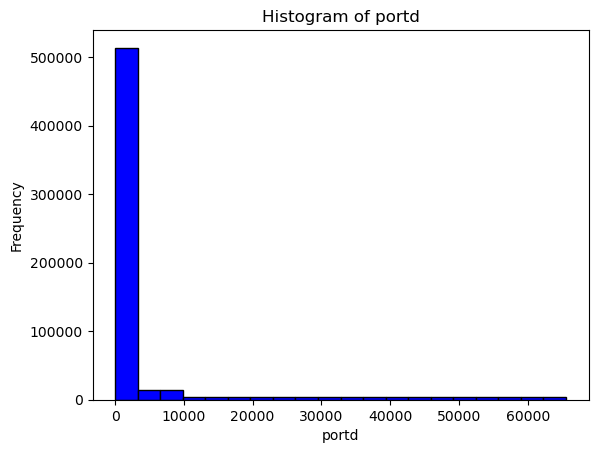

In [6]:
df['portd'] = pd.to_numeric(df['portd'], errors='coerce')

df = df.dropna(subset=['portd'])

plt.hist(df['portd'], bins=20, color='blue', edgecolor='black')

plt.xlabel('portd')
plt.ylabel('Frequency')
plt.title('Histogram of portd')

plt.show()


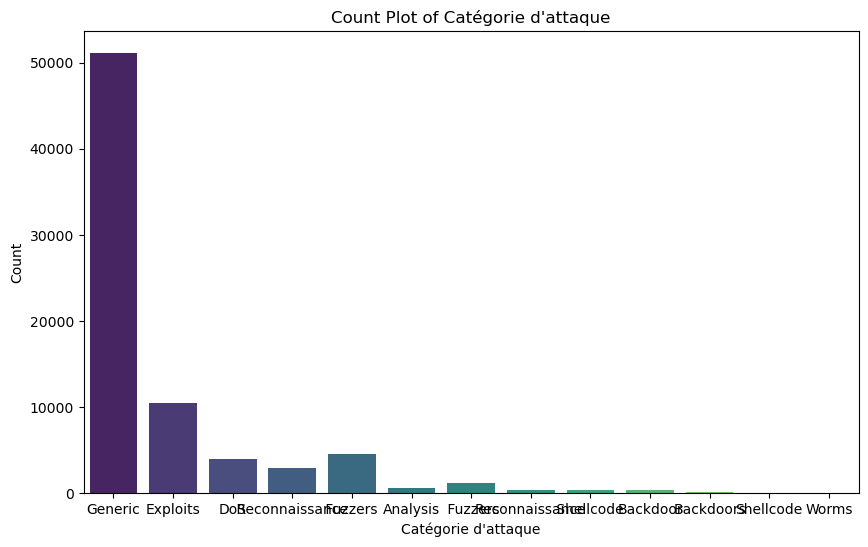

In [7]:
df['pports'] = pd.to_numeric(df['pports'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.countplot(x='Catégorie d\'attaque', data=df, palette='viridis')
plt.xlabel('Catégorie d\'attaque')
plt.ylabel('Count')
plt.title('Count Plot of Catégorie d\'attaque')
plt.show()



In [ ]:
df['pports'] = pd.to_numeric(df['pports'], errors='coerce')

df = df.dropna(subset=['Catégorie d\'attaque', 'pports'])

contingency_table = pd.crosstab(df['Catégorie d\'attaque'], df['pports'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.xlabel('pports')
plt.ylabel('Catégorie d\'attaque')
plt.title('Contingency Table Heatmap')
plt.show()


In [ ]:

df['pports'] = pd.to_numeric(df['pports'], errors='coerce')

df = df.dropna(subset=['Catégorie d\'attaque', 'pports'])

contingency_table = pd.crosstab(df['Catégorie d\'attaque'], df['pports'])

plt.figure(figsize=(18, 8))
sns.barplot(data=contingency_table.reset_index(), x='Catégorie d\'attaque', y=contingency_table.columns[0], palette='viridis')
plt.xlabel('Catégorie d\'attaque')
plt.ylabel('Count')
plt.title('Clustered Bar Plot of Catégorie d\'attaque with pports')
plt.show()


In [ ]:

label_encoder = LabelEncoder()
df['Catégorie d\'attaque_encoded'] = label_encoder.fit_transform(df['Catégorie d\'attaque'])

df['pports'] = pd.to_numeric(df['pports'], errors='coerce')
plt.figure(figsize=(12, 8))
sns.regplot(x='pports', y='Catégorie d\'attaque_encoded', data=df, scatter=True, line_kws={'color': 'red'})
plt.xlabel('pports')
plt.ylabel('Catégorie d\'attaque (Encoded)')
plt.title('Regression Plot of pports vs. Catégorie d\'attaque')
plt.show()


In [ ]:


df['asip_numeric'] = df['asip'].str.split('.').str[-1]
df['asip_numeric'] = pd.to_numeric(df['asip_numeric'], errors='coerce')


# Filter out non-NaN values and encode them
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(df['Catégorie d\'attaque'].dropna())

# Create a new column to store the encoded values
df['Encoded_Catégorie'] = pd.NA

# Assign the encoded values to the corresponding indices in the new column
df.loc[df['Catégorie d\'attaque'].notna(), 'Encoded_Catégorie'] = encoded_values

print(df.head())

plt.figure(figsize=(12, 8))
sns.regplot(x='asip_numeric', y='Catégorie d\'attaque_encoded', data=df, scatter=True, line_kws={'color': 'red'})

plt.xlabel('asip_numeric')
plt.ylabel('Catégorie d\'attaque (Encoded)')
plt.title('Regression Plot of asip_numeric vs. Catégorie d\'attaque')
plt.show()


In [ ]:

attack_category_counts = df['Catégorie d\'attaque'].value_counts()

plt.figure(figsize=(10,8))
plt.pie(attack_category_counts, labels=attack_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attack Categories')
plt.setp(plt.gca().get_xticklabels(), fontsize=50)

plt.show()


In [ ]:




protocole_counts = df['Protocole'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(protocole_counts, labels=protocole_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Protocole')
plt.setp(plt.gca().get_xticklabels(), fontsize=50)

plt.show()


In [ ]:




protocole_counts = df['État'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(protocole_counts, labels=protocole_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of État')
plt.setp(plt.gca().get_xticklabels(), fontsize=50)

plt.show()


In [ ]:




protocole_counts = df['SYNACK'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(protocole_counts, labels=protocole_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of SYNACK')
plt.setp(plt.gca().get_xticklabels(), fontsize=50)

plt.show()


In [ ]:



plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TMS'], label='TMS Time Series')
plt.title('Time Series Plot for Transmission Mean Size (TMS)')
plt.xlabel('Time')
plt.ylabel('Transmission Mean Size (TMS) Values')
plt.legend()
plt.show()


In [ ]:


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TMD'], label='TMD Time Series')
plt.title('Time Series Plot for Transmission mean duration')
plt.xlabel('Time')
plt.ylabel('Transmission mean duration Values')
plt.legend()
plt.show()


In [ ]:



plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Int-paquets-s'], label='Interval between packets sent Time Series')
plt.title('Time Series Plot for Interval between packets sent.​')
plt.xlabel('Time')
plt.ylabel('Interval between packets sent values.​')
plt.legend()
plt.show()


In [ ]:



plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Int-paquets-d'], label='Interval between packets received Time Series')
plt.title('Time Series Plot for Interval between packets received.​')
plt.xlabel('Time')
plt.ylabel('Interval between packets received values.​')
plt.legend()
plt.show()


# Replacing missing values

In [2]:


columns_with_dash = [col for col in df.columns if '-' in df[col].astype(str).values]

print("Columns with '-' in their values:")
for col in columns_with_dash:
    print(col)

null_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
for col in null_columns:
    print(col)


Columns with '-' in their values:
pports
portd
Service
Columns with null values:
SV-flue HTTP method
EsTfTP-login
Catégorie d'attaque


In [ ]:
unique_values_per_column = {}
for column in df.columns:
    unique_values_per_column[column] = df[column].unique()

for column, unique_values in unique_values_per_column.items():
    print(f"Unique values for column '{column}': {unique_values}")


In [3]:

mean_value = df['SV-flue HTTP method'].mean()
df['SV-flue HTTP method'] = df['SV-flue HTTP method'].fillna(mean_value)

mean_value2 = df['EsTfTP-login'].mean()
df['EsTfTP-login'] = df['EsTfTP-login'].fillna(mean_value2)


df.replace(['-', ' '], pd.NA, inplace=True)

df['pports'] = pd.to_numeric(df['pports'])
mean_value3 = df['pports'].mean()
df['pports'] = df['pports'].fillna(mean_value3)


df['portd'] = pd.to_numeric(df['portd'],errors='coerce')
mean_value4 = df['portd'].mean()
df['portd'] = df['portd'].fillna(mean_value4)




In [4]:

mode_value = df['SC-FTP-CMD'].mode()[0]

df['SC-FTP-CMD'].fillna(mode_value, inplace=True)
unique_values = df['SC-FTP-CMD'].unique()

numerical_mapping = {val: i for i, val in enumerate(unique_values)}

df['SC-FTP-CMD'] = df['SC-FTP-CMD'].map(numerical_mapping)


In [5]:

df.replace(['-', ' '], pd.NA, inplace=True)
mode_value = df['Service'].mode()[0]
df['Service'].fillna(mode_value, inplace=True)


In [6]:
# Replace missing values (NaNs) with the most frequent value
most_frequent_value = df['Catégorie d\'attaque'].mode()[0]
df['Catégorie d\'attaque'].fillna(most_frequent_value, inplace=True)


# DATA encoding

In [14]:

encoded_df = pd.get_dummies(df, columns=['Protocole'])
df=encoded_df


KeyError: "None of [Index(['Protocole'], dtype='object')] are in the [columns]"

In [15]:

encoded_df = pd.get_dummies(df, columns=['État'])
df=encoded_df



KeyError: "None of [Index(['État'], dtype='object')] are in the [columns]"

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Service'] = label_encoder.fit_transform(df['Service'].astype(str))

print("Unique values after label encoding:", df['Service'].unique())


Unique values after label encoding: [ 1  6  2 10  4  5  3  8  7 11  0  9]


In [17]:
import ipaddress

df['asip'] = df['asip'].apply(lambda x: int(ipaddress.IPv4Address(x)) if pd.notnull(x) else None)
df['adip'] = df['adip'].apply(lambda x: int(ipaddress.IPv4Address(x)) if pd.notnull(x) else None)



In [18]:
from sklearn.preprocessing import LabelEncoder

# Filter out non-NaN values and encode them
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(df['Catégorie d\'attaque'].dropna())

# Assign the encoded values to the corresponding indices in the original column
df.loc[df['Catégorie d\'attaque'].notna(), 'Catégorie d\'attaque'] = encoded_values

# Print the unique values after label encoding
print("Unique values after label encoding:", df['Catégorie d\'attaque'].unique())


Unique values after label encoding: [ 9  8  7  2  1  4  0 10  3  5  6 11 12]


In [19]:
# Get column names with NaN values
columns_with_nan = df.columns[df.isna().any()].tolist()

# Print column names with NaN values

print("Column names with NaN values:", columns_with_nan)


Column names with NaN values: []


# verify if there is non numerical columns left

In [20]:
import pandas as pd

def get_non_numerical_columns(df):
    non_numerical_columns = df.select_dtypes(exclude=['number']).columns.tolist()
    if non_numerical_columns:
        return non_numerical_columns
    else:
        return None

# Assuming df is your DataFrame
non_numerical_columns = get_non_numerical_columns(df)

if non_numerical_columns:
    print("The following columns contain non-numerical values:", non_numerical_columns)
else:
    print("All columns in the DataFrame are numerical.")


All columns in the DataFrame are numerical.


# Modeling

# Random forest

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Step 1: Extract features (X) and target variable (y) from the DataFrame
X = df.drop(columns=['Catégorie d\'attaque'])  # Drop the target column to get features
y = df['Catégorie d\'attaque']  # Extract the target column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Instantiate the model
model.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Make predictions
y_pred_train = model.predict(X_train)  # Predictions on the training data
y_pred_test = model.predict(X_test)    # Predictions on the testing data

# Step 5: Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)  # Calculate training accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)     # Calculate testing accuracy

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.99290625
Testing Accuracy: 0.9799916666666667


# Support vector machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Catégorie d\'attaque'])  # Drop the target column to get features
y = df['Catégorie d\'attaque']  # Extract the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', random_state=42)  # Instantiate the model with a linear kernel
model.fit(X_train, y_train)  # Train the model on the training data

y_pred_train = model.predict(X_train)  # Predictions on the training data
y_pred_test = model.predict(X_test)    # Predictions on the testing data

train_accuracy = accuracy_score(y_train, y_pred_train)  # Calculate training accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)     # Calculate testing accuracy

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


# Logistic Regression classifier

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Extract features (X) and target variable (y) from the DataFrame
X = df.drop(columns=['Catégorie d\'attaque'])  # Drop the target column to get features
y = df['Catégorie d\'attaque']  # Extract the target column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define and train the model
model = LogisticRegression(max_iter=1000, random_state=42)  # Instantiate the Logistic Regression model
model.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Make predictions
y_pred_train = model.predict(X_train)  # Predictions on the training data
y_pred_test = model.predict(X_test)    # Predictions on the testing data

# Step 5: Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)  # Calculate training accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)     # Calculate testing accuracy

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


C:\Users\habensalah\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9575666666666667
Testing Accuracy: 0.9571416666666667


# Gradient Boosting

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Step 1: Extract features (X) and target variable (y) from the DataFrame
X = df.drop(columns=['Catégorie d\'attaque'])  # Drop the target column to get features
y = df['Catégorie d\'attaque']  # Extract the target column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define and train the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)  # Instantiate the Gradient Boosting model
model.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Make predictions
y_pred_train = model.predict(X_train)  # Predictions on the training data
y_pred_test = model.predict(X_test)    # Predictions on the testing data

# Step 5: Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)  # Calculate training accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)     # Calculate testing accuracy

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.96781875
Testing Accuracy: 0.9676666666666667


# KNN

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Extract features (X) and target variable (y) from the DataFrame
X = df.drop(columns=['Catégorie d\'attaque'])  # Drop the target column to get features
y = df['Catégorie d\'attaque']  # Extract the target column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define and train the model
model = KNeighborsClassifier(n_neighbors=5)  # Instantiate the KNN model with 5 neighbors
model.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Make predictions
y_pred_train = model.predict(X_train)  # Predictions on the training data
y_pred_test = model.predict(X_test)    # Predictions on the testing data

# Step 5: Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)  # Calculate training accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)     # Calculate testing accuracy

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


C:\Users\habensalah\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\habensalah\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

Training Accuracy: 0.9715208333333333
Testing Accuracy: 0.9616416666666666
